/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


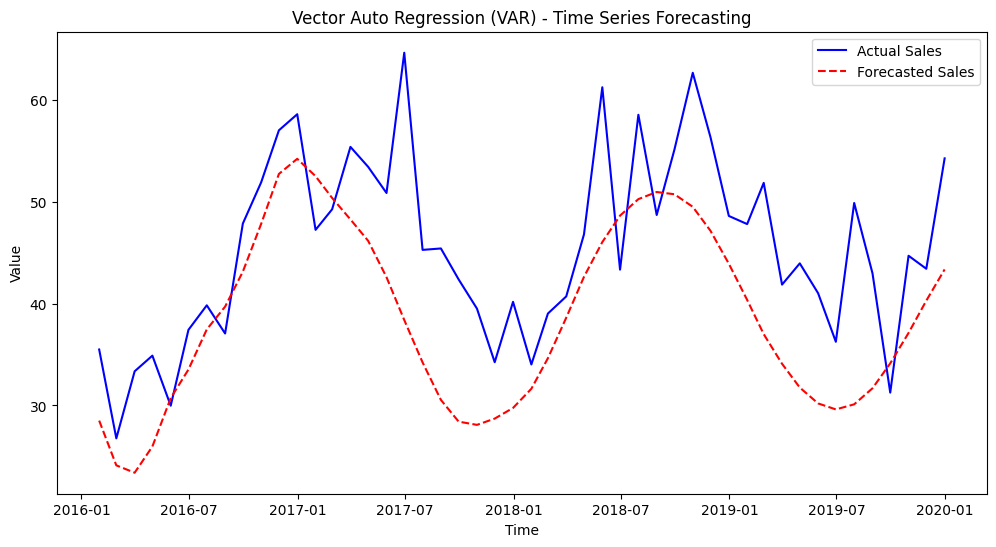

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from sklearn.preprocessing import StandardScaler

# Step 1: Generate Synthetic Multivariate Time Series Data
date_rng = pd.date_range(start='2000-01-01', periods=240, freq='ME')  # Monthly data
np.random.seed(42)

trend = np.linspace(10, 50, 240)  # Linear increasing trend
seasonality = 10 * np.sin(np.linspace(0, 24 * np.pi, 240))  # Seasonal pattern
noise1 = np.random.normal(scale=5, size=240)  # Random noise for variable 1
noise2 = np.random.normal(scale=4, size=240)  # Random noise for variable 2

var1 = trend + seasonality + noise1  # Variable 1 (e.g., sales)
var2 = trend * 0.8 + seasonality * 1.2 + noise2  # Variable 2 (e.g., marketing spend)

df = pd.DataFrame({'Date': date_rng, 'Sales': var1, 'Marketing': var2})
df.set_index('Date', inplace=True)

# Step 2: Normalize Data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

# Step 3: Train-Test Split
train_size = int(len(df_scaled) * 0.8)
train, test = df_scaled[:train_size], df_scaled[train_size:]

# Step 4: Fit VAR Model
model = VAR(train)
order = model.select_order(maxlags=12)  # Select best lag order
lag_order = order.aic  # Use AIC to determine best lag
var_model = model.fit(lag_order)

# Step 5: Make Predictions
forecast_steps = len(test)  # Forecast the same length as test data
forecast_input = train.values[-lag_order:]  # Get last 'lag_order' values
forecast = var_model.forecast(forecast_input, steps=forecast_steps)

# Convert forecasted values back to DataFrame
forecast_df = pd.DataFrame(forecast, columns=df.columns, index=test.index)

# Reverse Scaling
forecast_inv = pd.DataFrame(scaler.inverse_transform(forecast_df), columns=df.columns, index=test.index)
test_inv = pd.DataFrame(scaler.inverse_transform(test), columns=df.columns, index=test.index)

# Step 6: Plot Results
plt.figure(figsize=(12, 6))
plt.plot(test_inv.index, test_inv['Sales'], label="Actual Sales", color='blue')
plt.plot(forecast_inv.index, forecast_inv['Sales'], label="Forecasted Sales", color='red', linestyle='dashed')
plt.legend()
plt.title("Vector Auto Regression (VAR) - Time Series Forecasting")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()
